In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

df = pd.read_csv('df_for_ML.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2247 non-null   int64  
 1   Цена                      2247 non-null   float64
 2   Год                       2247 non-null   float64
 3   Километраж                2247 non-null   float64
 4   Количество дверей         2247 non-null   float64
 5   Количество мест           2247 non-null   float64
 6   Длина                     2247 non-null   float64
 7   Ширина                    2247 non-null   float64
 8   Высота                    2247 non-null   float64
 9   Максимальная скорость     2247 non-null   float64
 10  Разгон до 100             2247 non-null   float64
 11  Лошадиные силы            2247 non-null   float64
 12  Обороты в минуту          2247 non-null   float64
 13  Город_ekaterinburg        2247 non-null   float64
 14  Город_mo

Возьмём наш датафрейм после обработки от выбросов и после ОНЕ кодирования. В голову пришло три новые переменные, которые мы можем собрать из характеристик нашего датафрейма. Это:

### Объём  = Длина * Широта * Высота
Простенькая переменная, которая ляжет в основу двух других новых переменных. Высчитывается как произведение размеров автомобиля по широте, высоте и длине. Единица измерения - м^3 


### Удельная мощность автомобиля = Лошадиные силы / Объём
Данная переменная будет более показательна, чем просто мощность автомобиля в лошадиных силах. Как мы знаем, чем больше автомобиль, тем ему требуется по логике больше мощности. Однако приведенное выше соотношение поможет определить избыточную мощность (например, маленький спортивный автомобиль может иметь огромную мощность и небольшой размер/объём/массу, за счёт чего на дороге она будет быстрее и мощнее) Единица измерения переменной - (л/с)/(м^3)

### Плотность пассажирского пространства = Количество мест / Объём
Эта переменная отражает количество пассажирского пространства относительно размеров автомобиля. 
Измеряется в мест/м^3, показывает комфортность автомобиля для водителя и пассажиров (всем ведь хочется вытянуть ножки в машине ¯\_(ツ)_/¯)

In [28]:
import pandas as pd

# Создаём переменные "Объём","Удельная мощность автомобиля" и  "Плотность пассажирского пространства"
df['Объём'] = df['Длина'] * df['Ширина'] * df['Высота'] / 1000000000
df['Удельная мощность автомобиля'] = df['Лошадиные силы'] / df['Объём']
df['Плотность пассажирского пространства'] =  df['Количество мест'] / df['Объём']
df[:20]



,Unnamed: 0,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,...,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный,Объём,Удельная мощность автомобиля,Плотность пассажирского пространства
0,1,3440000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16.063549,14.069120,0.311264
1,2,7760000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
2,6,8690000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
3,7,8170000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
4,8,8060000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
5,9,7030000.0,2023.0,1000.0,5.0,6.0,5080.0,1995.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.242280,24.613151,0.328906
6,12,9890000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
7,14,8230000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
8,17,8270000.0,2024.0,1000.0,5.0,6.0,5218.0,1998.0,1800.0,180.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18.766015,23.926230,0.319727
9,18,3920000.0,2023.0,1000.0,5.0,5.0,4450.0,1836.0,1572.0,190.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.843554,33.324108,0.389300


 Для наших новых переменных построим графики, посмотрим на выбросы и почистим данные от них. Сначала займёмся объёмом
 

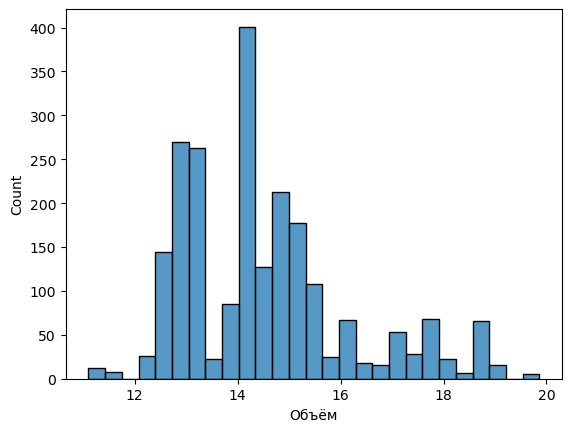

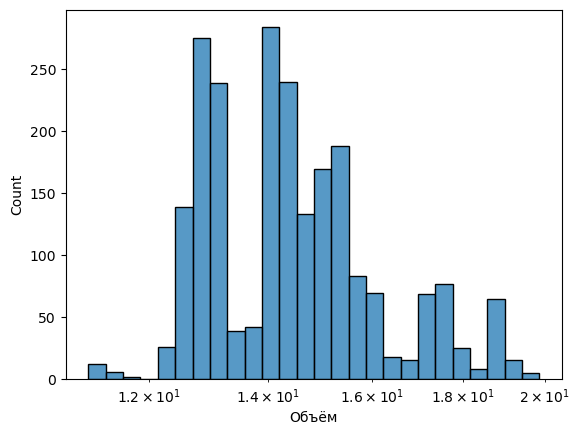

<Axes: >

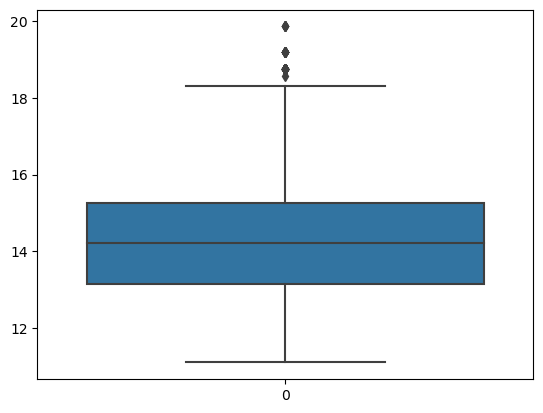

In [29]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Объём'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Объём'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Объём"])

Видны небольшие выбросы по верхней границе. Ограничим объём до 19 м^3

2247
2226


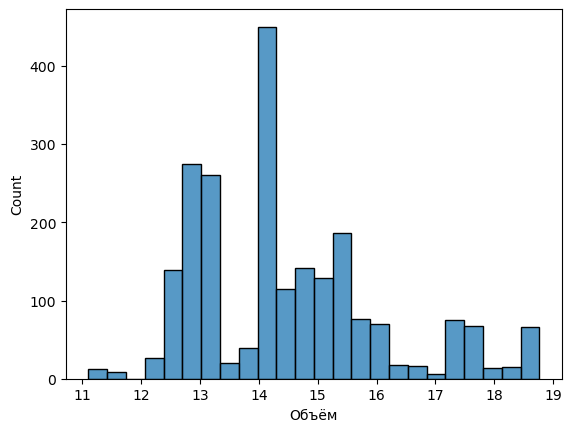

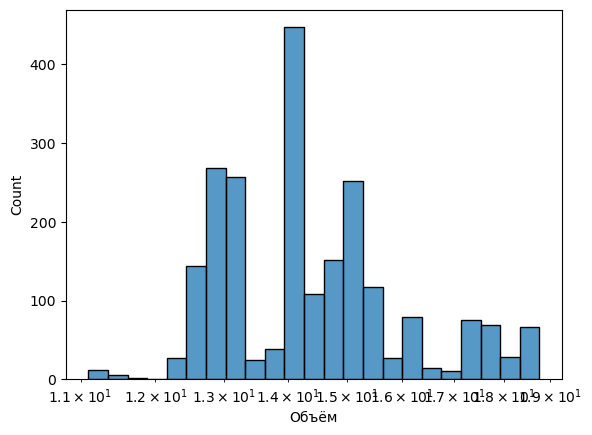

<Axes: >

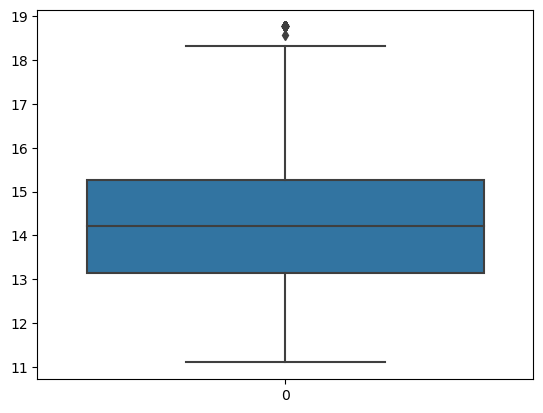

In [30]:
print(len(df))
df = df[df['Объём'] < 19]
print(len(df))
sns.histplot(df['Объём'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Объём'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Объём"])

Перейдём к удельной мощность автомобиля

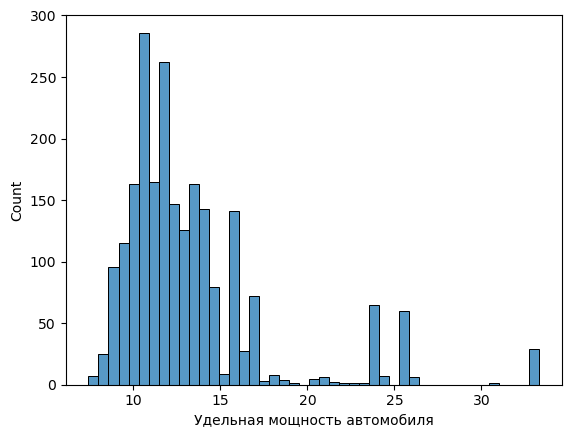

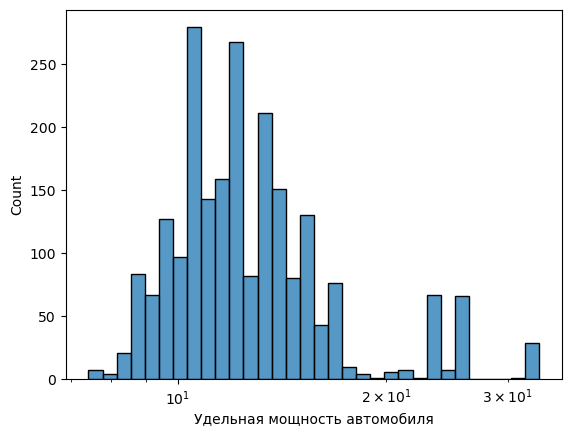

<Axes: >

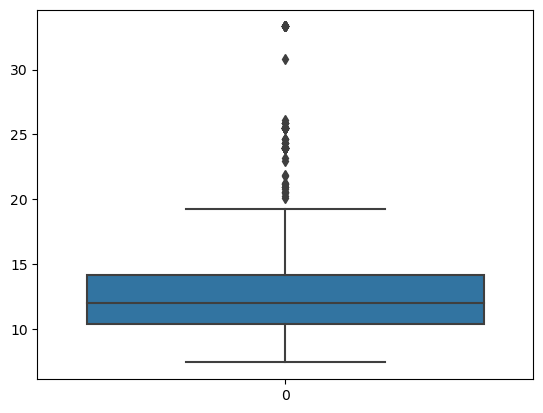

In [31]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Удельная мощность автомобиля'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Удельная мощность автомобиля'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Удельная мощность автомобиля"])

Длиный хвост по верхней границе. Это говорит о том, что есть некоторые автомобили, и из немного, у которых избыточная мощность довольна велика. Давайте убирать хвост. Возьмём значения до 22

2226
2056


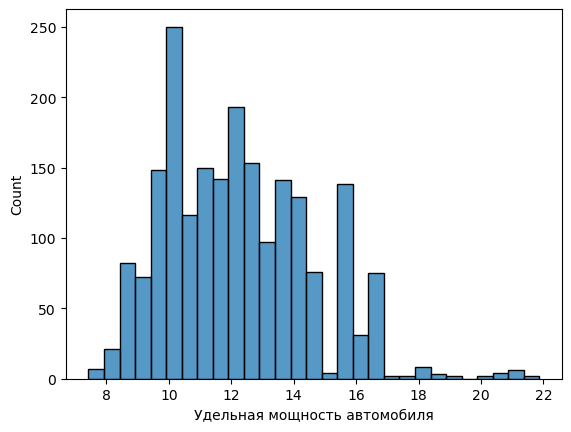

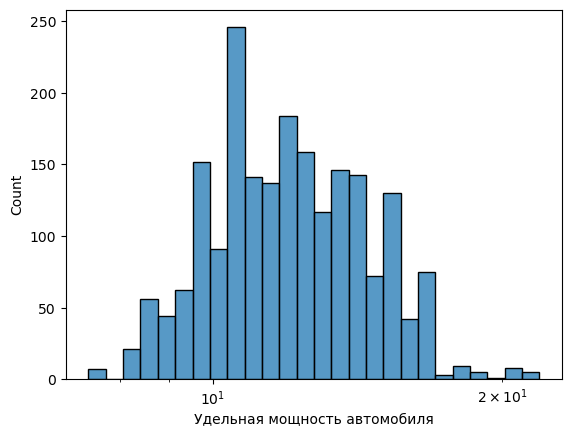

<Axes: >

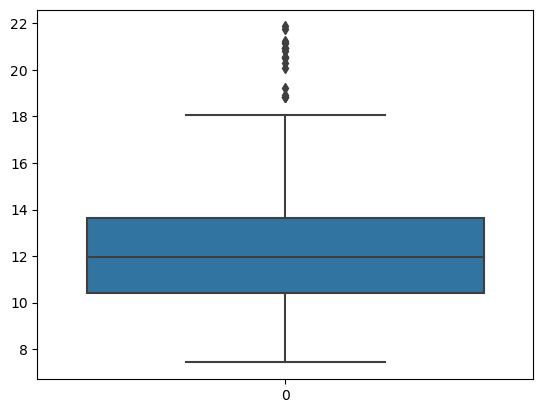

In [32]:
print(len(df))
df = df[df['Удельная мощность автомобиля'] < 22]
print(len(df))
sns.histplot(df['Удельная мощность автомобиля'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Удельная мощность автомобиля'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Удельная мощность автомобиля"])

Наконец, смотрим последнюю новую переменную - Плотность пассажирского пространства

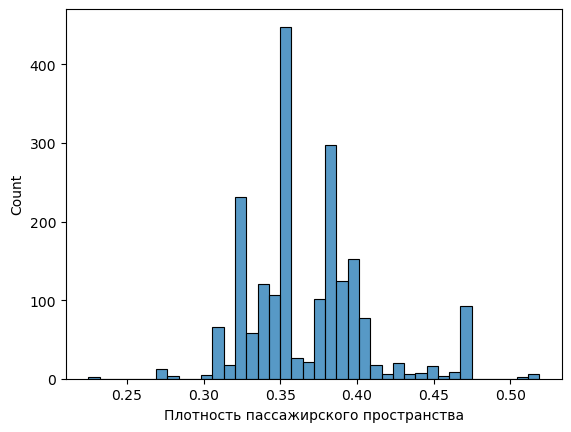

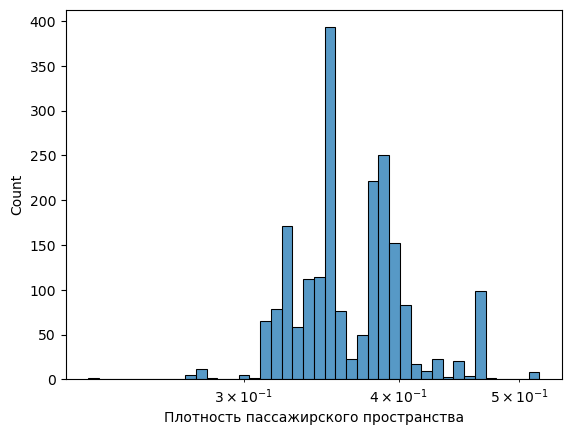

<Axes: >

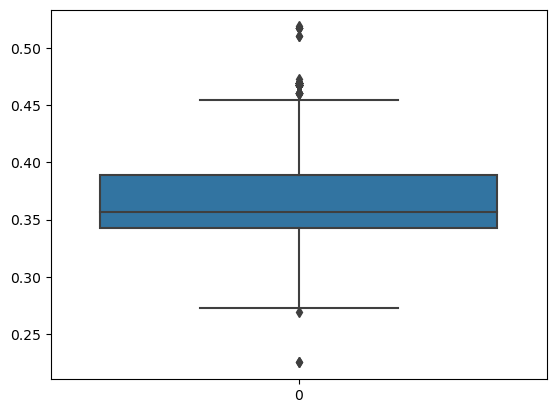

In [33]:
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Плотность пассажирского пространства'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Плотность пассажирского пространства'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df['Плотность пассажирского пространства'])

Также подчистим данные 

2056
2046


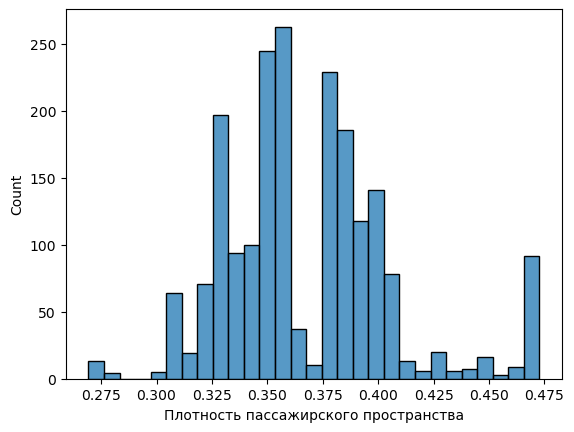

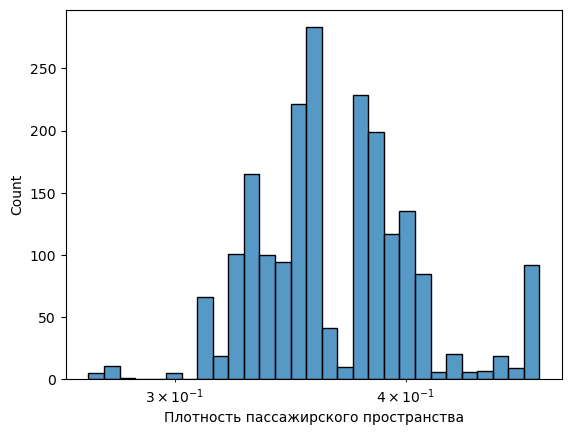

<Axes: >

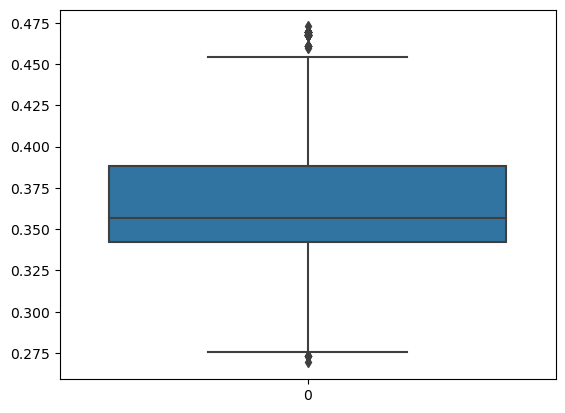

In [34]:
print(len(df))
df = df[df['Плотность пассажирского пространства'] > 0.25]
df = df[df['Плотность пассажирского пространства'] < 0.49]
print(len(df))
sns.histplot(df['Плотность пассажирского пространства'], log_scale=False)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.histplot(df['Плотность пассажирского пространства'], log_scale=True)
plt.show()
plt.ticklabel_format(style = 'plain')
sns.boxplot(df["Плотность пассажирского пространства"])

Готово! Новые переменные созданы и подчищены от выбросов. Выгрузим наш обновлённый data frame

In [35]:
df.to_csv('df_for_ML_upd', encoding='utf-8')